In [51]:
a = np.load("proyecto_training_data.npy")

In [45]:
import tensorflow as tf

In [85]:
x = a[:,1]
y = a[:,0]

In [53]:
import matplotlib.pyplot as plt

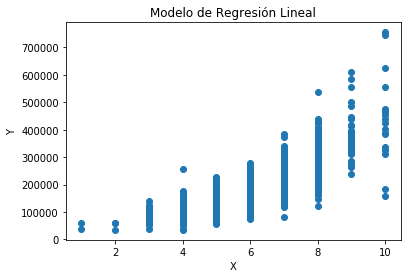

In [86]:
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Modelo de Regresión Lineal")
plt.show()

Aquí estamos definiendo las constantes. Es decir X y Y. X es un vector de tamaño 50 y Y también es un vector de 50.

In [84]:
X = tf.placeholder("float") 
Y = tf.placeholder("float")

In [87]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b")

In [117]:
learning_rate = 0.05
training_epochs = 100

In [118]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer()

In [119]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 10 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b)

Epoch 10 : cost = 36230840000.0 W = 37568.332 b = -46695.93
Epoch 20 : cost = 34883817000.0 W = 41647.434 b = -72131.47
Epoch 30 : cost = 34563030000.0 W = 43676.266 b = -84782.445
Epoch 40 : cost = 34489827000.0 W = 44685.348 b = -91074.65
Epoch 50 : cost = 34474810000.0 W = 45187.277 b = -94204.47
Epoch 60 : cost = 34472624000.0 W = 45436.977 b = -95761.45
Epoch 70 : cost = 34472833000.0 W = 45561.098 b = -96535.36
Epoch 80 : cost = 34473263000.0 W = 45622.87 b = -96920.625
Epoch 90 : cost = 34473574000.0 W = 45653.598 b = -97112.23
Epoch 100 : cost = 34473742000.0 W = 45668.844 b = -97207.31


In [61]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 34473378000.0 Weight = 45403.41 bias = -96512.01 



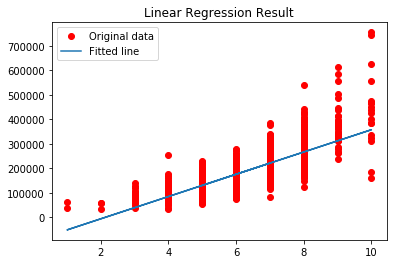

In [62]:
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show()

In [127]:
errores = np.array([[10, "nan"],
                   [1,41764725000],
                  [0.1,34481533000],
                   [0.01,34915463000],
                   [0.001,39959770000],
                   [0.0001,41525498000]])
print(errores)
print("El learning rate que reduce más la función de costo es el", errores[2,0], "con un error de", errores[2,1])

[['10' 'nan']
 ['1' '41764725000']
 ['0.1' '34481533000']
 ['0.01' '34915463000']
 ['0.001' '39959770000']
 ['0.0001' '41525498000']]
El learning rate que reduce más la función de costo es el 0.1 con un error de 34481533000
